# Exploring notebook

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys



# makes plots nice
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
    return ax

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)


data_path = os.path.join('nice_combined_data.csv')

In [2]:
df = pd.read_csv(data_path)
df.shape

(6574, 10)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,18,0.771111,163.500000,0.333333,4.166667,79.277778,-0.030782
1,2021-01-04,AMC,crazy buy amc right thinking going long amc lo...,1,0.440000,0.000000,0.000000,0.000000,18.000000,-0.086364
2,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,7,0.765714,97.428571,0.000000,0.428571,37.142857,-0.034667
3,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,9,0.737778,58.111111,0.000000,0.222222,31.777778,0.005960
4,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910


In [4]:
df['target_bin'] = df['target'].apply(lambda x : 1 if x > 0 else 0)

In [10]:
df.head()

,Date,mentioned,text,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,target_bin
0,2021-01-04,AAPL,weekend iv report ticker low iv cheap premium ...,18,0.771111,163.500000,0.333333,4.166667,79.277778,-0.030782,0
1,2021-01-04,AMC,crazy buy amc right thinking going long amc lo...,1,0.440000,0.000000,0.000000,0.000000,18.000000,-0.086364,0
2,2021-01-04,BA,weekend iv report ticker low iv cheap premium ...,7,0.765714,97.428571,0.000000,0.428571,37.142857,-0.034667,0
3,2021-01-04,BABA,weekend iv report ticker low iv cheap premium ...,9,0.737778,58.111111,0.000000,0.222222,31.777778,0.005960,1
4,2021-01-04,BB,guess company due diligence without revealing ...,1,0.960000,417.000000,1.000000,2.000000,51.000000,-0.017910,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6574 non-null   datetime64[ns]
 1   mentioned              6574 non-null   object        
 2   text                   6574 non-null   object        
 3   mentioned_count        6574 non-null   int64         
 4   upvote_ratio           6574 non-null   float64       
 5   score                  6574 non-null   float64       
 6   gilded                 6574 non-null   float64       
 7   total_awards_received  6574 non-null   float64       
 8   num_comments           6574 non-null   float64       
 9   target                 6574 non-null   float64       
 10  target_bin             6574 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 565.1+ KB


In [5]:
df = df[df['mentioned_count'] >= 3]
df.shape

(4380, 11)

(3982, 11)
Max:  3523
Min:  3


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

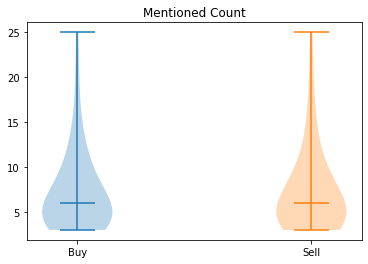

In [13]:
fig, ax = plt.subplots()
mc = df[df['mentioned_count'] <= 25]
print(mc.shape)
print('Max: ', df['mentioned_count'].max())
print('Min: ', df['mentioned_count'].min())
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['mentioned_count'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Mentioned Count')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Excluding outliers here so the plots can be usable (excluding about 400 records)


Max:  1.0
Min:  0.3999999999999999


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

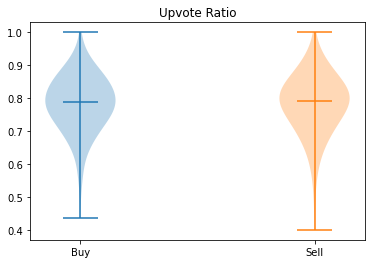

In [14]:
fig, ax = plt.subplots()
print('Max: ', df['upvote_ratio'].max())
print('Min: ', df['upvote_ratio'].min())
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df['upvote_ratio'][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Upvote Ratio')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

(3976, 11)
Max:  16102.2
Min:  0.3333333333333333


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

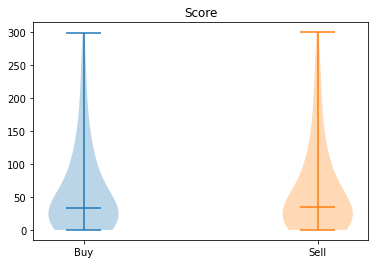

In [15]:
fig, ax = plt.subplots()
mc = df[df['score'] <= 300]
print(mc.shape)
print('Max: ', df['score'].max())
print('Min: ', df['score'].min())
ax.violinplot(mc['score'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['score'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Score')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

ABout 400 records excluded again

Gilded less than 1

(4359, 11)
Max:  13.5
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

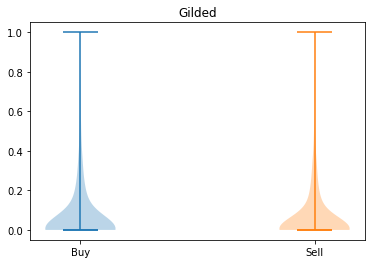

In [16]:
fig, ax = plt.subplots()
mc = df[df['gilded'] <= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Gilded')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Gilded other side (greater than 1 gilded)

(30, 11)
Max:  13.5
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

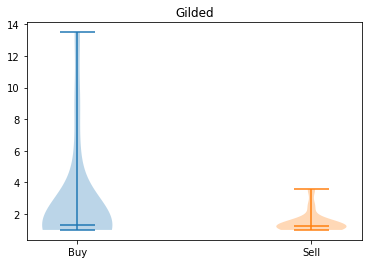

In [17]:
fig, ax = plt.subplots()
mc = df[df['gilded'] >= 1]
print(mc.shape)
print('Max: ', df['gilded'].max())
print('Min: ', df['gilded'].min())
ax.violinplot(mc['gilded'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['gilded'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Gilded')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

The above graph is only 30 samples!!!!!!

(4262, 11)
Max:  324.3
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

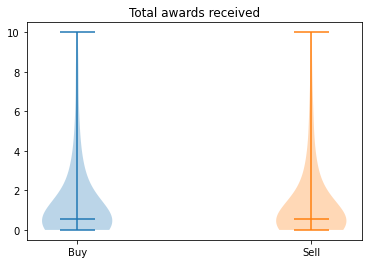

In [18]:
fig, ax = plt.subplots()
mc = df[df['total_awards_received'] <= 10]
print(mc.shape)
print('Max: ', df['total_awards_received'].max())
print('Min: ', df['total_awards_received'].min())
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['total_awards_received'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Total awards received')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

(4276, 11)
Max:  2811.3888888888887
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

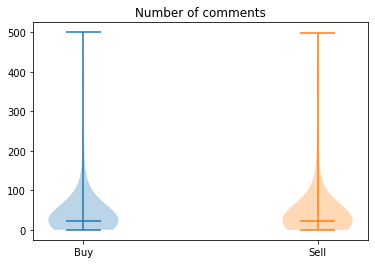

In [19]:
fig, ax = plt.subplots()
mc = df[df['num_comments'] <= 500]
print(mc.shape)
print('Max: ', df['num_comments'].max())
print('Min: ', df['num_comments'].min())
ax.violinplot(mc['num_comments'][mc['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(mc['num_comments'][mc['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title('Number of comments')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

In [20]:
df['target_bin'].value_counts()

0    2257
1    2123
Name: target_bin, dtype: int64

Pretty balanced dataset... Nice

Min of score: 0.3333333333333333
Max of score: 498.0


(4196, 11)

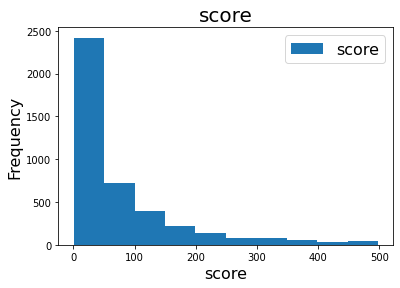

In [21]:
def make_hist(ax, col, df):
    print(f'Min of {col}: {df[col].min()}')
    print(f'Max of {col}: {df[col].max()}')
    ax = df[col].plot(kind='hist', ax=ax)
    make_pretty(ax, f'{col}', col, 'Frequency')
    
fig, ax = plt.subplots()
mc = df[df['score'] <= 500]
make_hist(ax, 'score', mc)
mc.shape
    

Min of mentioned_count: 3
Max of mentioned_count: 20


(3883, 11)

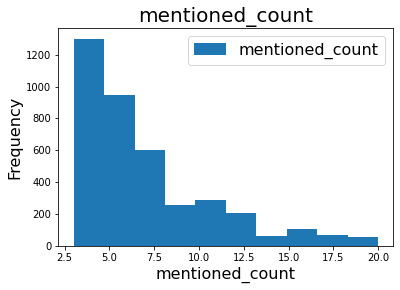

In [22]:
fig, ax = plt.subplots()
mc = df[df['mentioned_count'] <= 20]
make_hist(ax, 'mentioned_count', mc)
mc.shape

Min of upvote_ratio: 0.3999999999999999
Max of upvote_ratio: 1.0


(4380, 11)

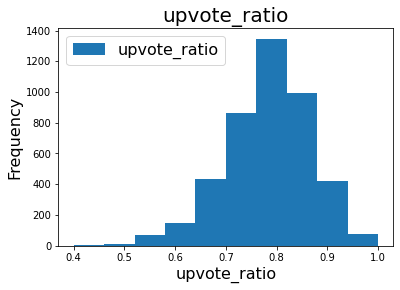

In [23]:
fig, ax = plt.subplots()

make_hist(ax, 'upvote_ratio', df)
df.shape

Min of gilded: 0.0
Max of gilded: 1.0


(4359, 11)

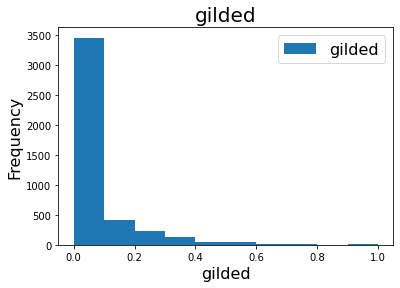

In [24]:
fig, ax = plt.subplots()
mc = df[df['gilded'] <= 1]
make_hist(ax, 'gilded', mc)
mc.shape

Min of total_awards_received: 0.0
Max of total_awards_received: 9.875


(4258, 11)

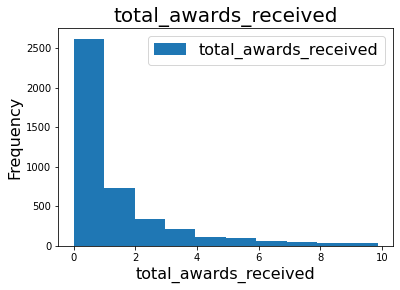

In [25]:
fig, ax = plt.subplots()
mc = df[df['total_awards_received'] < 10]
make_hist(ax, 'total_awards_received', mc)
mc.shape

Min of num_comments: 0.0
Max of num_comments: 198.85


(4095, 11)

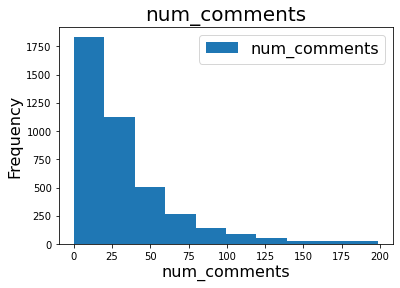

In [26]:
fig, ax = plt.subplots()
mc = df[df['num_comments'] < 200]
make_hist(ax, 'num_comments', mc)
mc.shape

In [27]:
df.corr()

/var/folders/6k/4xftj4fd3r77tpp_89lhnqrm0000gn/T/ipykernel_31984/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mentioned_count,upvote_ratio,score,gilded,total_awards_received,num_comments,target,target_bin
mentioned_count,1.000000,0.046555,0.045531,0.004126,0.018266,0.122055,-0.120712,-0.029989
upvote_ratio,0.046555,1.000000,0.104676,0.045639,0.071417,0.082824,-0.005414,0.005991
score,0.045531,0.104676,1.000000,0.731090,0.872301,0.343059,-0.013926,0.008884
gilded,0.004126,0.045639,0.731090,1.000000,0.902124,0.256303,0.003740,0.027709
total_awards_received,0.018266,0.071417,0.872301,0.902124,1.000000,0.322741,0.002116,0.021817
num_comments,0.122055,0.082824,0.343059,0.256303,0.322741,1.000000,0.090023,0.000624
target,-0.120712,-0.005414,-0.013926,0.003740,0.002116,0.090023,1.000000,0.425151
target_bin,-0.029989,0.005991,0.008884,0.027709,0.021817,0.000624,0.425151,1.000000


### Feature Engineering - Sentiment Analysis

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

(Takes 10 minutes to run beware)

In [6]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from tqdm import tqdm
tqdm.pandas()
nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

df['polarity'] = df['text'].progress_apply(lambda x : analyzer.polarity_scores(x))
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/benfouch/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
100%|██████████| 4380/4380 [10:48<00:00,  6.75it/s]  


### Sentiment feature analysis

Min of neg: 0.0
Max of neg: 0.209


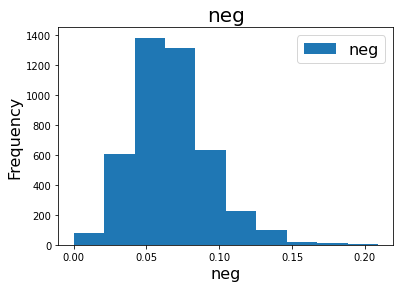

In [35]:
fig, ax = plt.subplots()
make_hist(ax, 'neg', df)


Min of pos: 0.0
Max of pos: 0.359


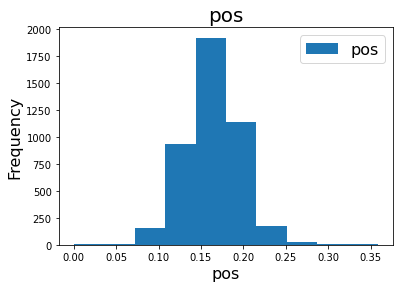

In [30]:
fig, ax = plt.subplots()
make_hist(ax, 'pos', df)

Min of neu: 0.575
Max of neu: 0.997


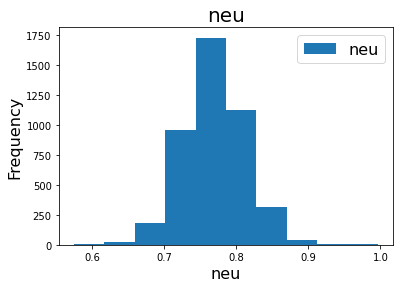

In [31]:
fig, ax = plt.subplots()
make_hist(ax, 'neu', df)

Max:  0.359
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

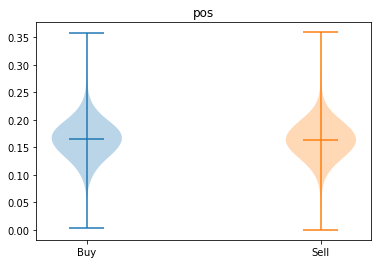

In [32]:
fig, ax = plt.subplots()
col_name = 'pos'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Max:  0.209
Min:  0.0


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

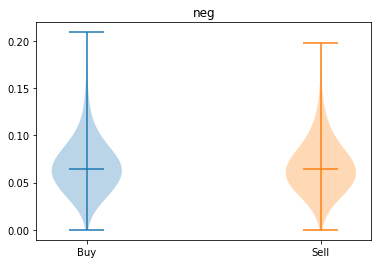

In [33]:
fig, ax = plt.subplots()
col_name = 'neg'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

Max:  0.997
Min:  0.575


[Text(1, 0, 'Buy'), Text(2, 0, 'Sell')]

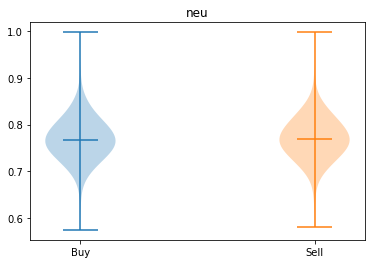

In [34]:
fig, ax = plt.subplots()
col_name = 'neu'


print('Max: ', df[col_name].max())
print('Min: ', df[col_name].min())
ax.violinplot(df[col_name][df['target_bin'] == 1], showmedians=True, positions=[1], widths=0.3,bw_method=0.5)
ax.violinplot(df[col_name][df['target_bin'] == 0], showmedians=True, positions=[2], widths=0.3,bw_method=0.5)
ax.set_title(col_name)
ax.set_xticks([1, 2])
ax.set_xticklabels(['Buy', 'Sell'])

### Maybe some statistical tests here for numerical features

In [16]:
from scipy.stats import kruskal

cont_var = ['mentioned_count', 'upvote_ratio', 'score', 'gilded', 'total_awards_received', 'num_comments', 'neu', 'neg', 'pos']

for x in cont_var:
    samples_by_group = []
    for y in set(df['target_bin']):
        mask = df['target_bin'] == y
        samples_by_group.append(df[x][mask]) 
    stat, p = kruskal(*samples_by_group, nan_policy='omit')
# alpha = 0.01
# for var in cont_var:
#     ops = list(df[var].unique())
#     if len(ops) > 1:
#         price_arrays = [df['target_bin'][df[var]==t] for t in ops]
#         _, p = kruskal(*price_arrays)
#         print(str(var) + ' | ' + str(p) + ' | ' + str(p < alpha))
#     else:
#         print(str(var) + ' | NA | NA')
    


    print(f'{x} p: {p}')

mentioned_count p: 0.05099168091982816
upvote_ratio p: 0.8595651261261188
score p: 0.8117301240047156
gilded p: 0.8646329381460887
total_awards_received p: 0.8758317043068967
num_comments p: 0.43199302191642874
neu p: 0.10125965468509818
neg p: 0.635320353454075
pos p: 0.1065567106206536


### Some graphics for the text

In [21]:
df.head()
df.target.abs().std()

0.03741977808533908